In [106]:
# import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

### **Data Loading and Initial Exploration (EDA)**

In [88]:
# load dataset
df = pd.read_csv('/content/drive/MyDrive/data.csv')

In [89]:
# inspect the data (check first 5 rows of the dataset)
df.head()

,youtube,facebook,newspaper,sales
0,276.12,45.36,83.04,26.52
1,53.40,47.16,54.12,12.48
2,20.64,55.08,83.16,11.16
3,181.80,49.56,70.20,22.20
4,216.96,12.96,70.08,15.48


In [90]:
# check last 5 rows of the dataset
df.tail()

,youtube,facebook,newspaper,sales
195,45.84,4.44,16.56,9.12
196,113.04,5.88,9.72,11.64
197,212.40,11.16,7.68,15.36
198,340.32,50.40,79.44,30.60
199,278.52,10.32,10.44,16.08


In [91]:
# check data types and not-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    200 non-null    float64
 1   facebook   200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [92]:
# check the descriptive statisics of the dataset
df.describe()

,youtube,facebook,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,176.451000,27.916800,36.664800,16.827000
std,103.025084,17.816171,26.134345,6.260948
min,0.840000,0.000000,0.360000,1.920000
25%,89.250000,11.970000,15.300000,12.450000
50%,179.700000,27.480000,30.900000,15.480000
75%,262.590000,43.830000,54.120000,20.880000
max,355.680000,59.520000,136.800000,32.400000


In [93]:
# check for duplicate rows count
df.duplicated().sum()

np.int64(0)

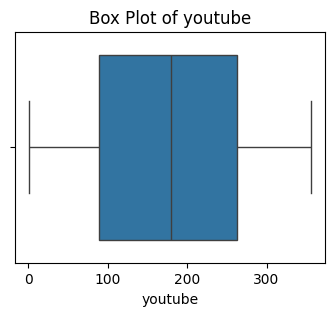

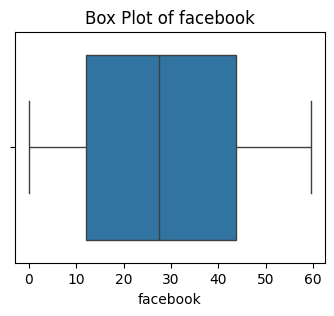

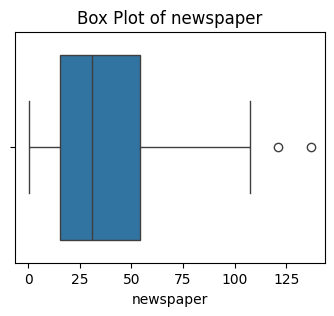

In [94]:
# explore each column by using box-plot to see whethere there are any outliers
for column in df.columns[:3]:
  plt.figure(figsize=(4, 3))
  sns.boxplot(x=df[column])
  plt.title(f'Box Plot of {column}')
  plt.xlabel(column)
  plt.show()

*   As we can see there are two outliers in the newspaper data, located around 120–130

* Since there can be a situation like the campaing spent a higher budget on newspaper and check for the sales, we will remain that two values as it is.

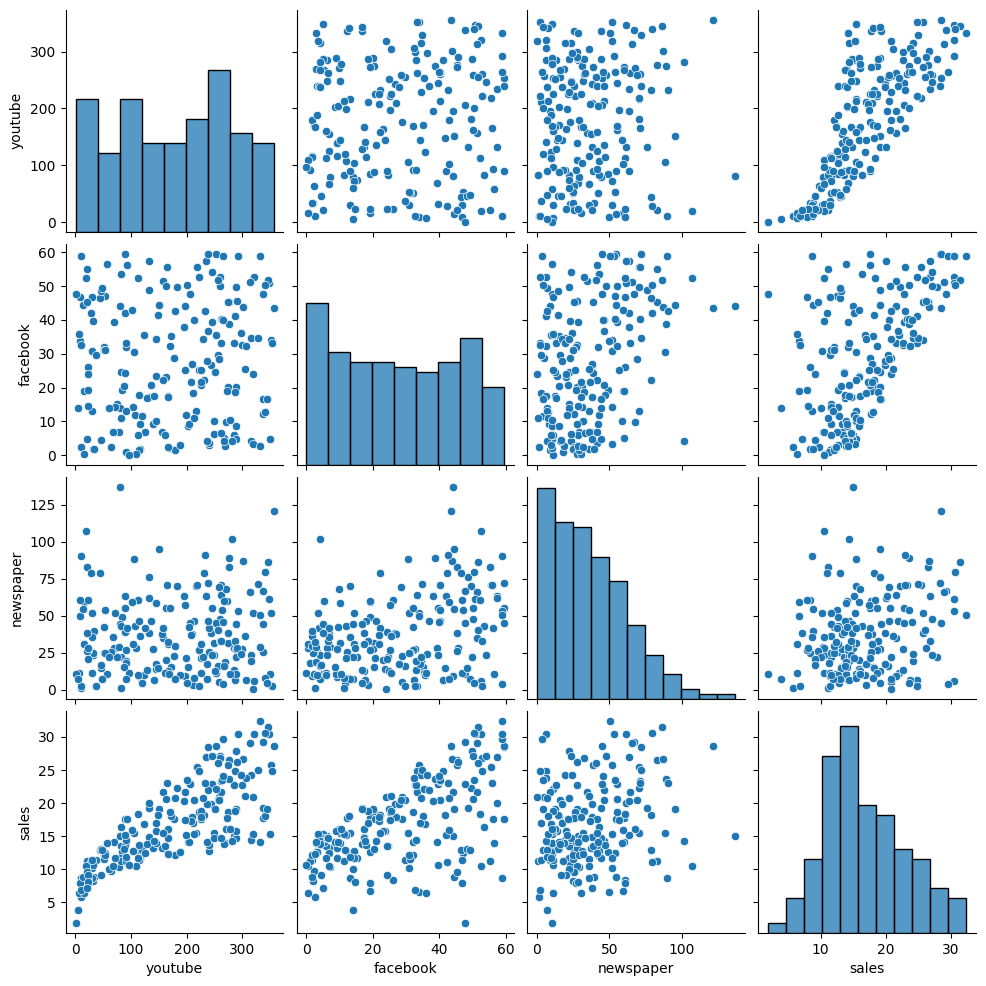

In [95]:
# draw pair plot for all the combinations of columns
sns.pairplot(df)

In [96]:
# check the correlation matrix
df.corr()

,youtube,facebook,newspaper,sales
youtube,1.000000,0.054809,0.056648,0.782224
facebook,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


### Let's interprete the result of the pairplot and the correlations we calculated

*   In the pairplot the bottom row is the most interested, because it contains the plots sales on the y-axis against each advertising platform on the x-axis.

*   Youtube and the Facebook budgets looks like having a poisitve, approximately linear relationship with sales

*   Youtube budget correlation is much stronger than the Facebook budget
  (0.782224 > 	0.576223)

*   Relationship between Newspaper budget and the sales appears very weak and doesn't show a linearity

* Since the correlations between predictors(youtube, facebook and newspaper) are much lower, we can conclude that they are independently affect to the sales.

* The distribution of the Newspaper is skewed to the right, meaning they have spent a relatively lower amount on Newspaper ads.


### **Building the Multiple Linear Regression Model**

In [97]:
# define the model formula
# Sales is the dependent variable (~), and the advertising budgets are independent variables
# statsmodels.formula.api, the intercept is included by default when we use the ~ operator in the formula
model_formula = 'sales ~ youtube + facebook + newspaper'

# fit the model
model = smf.ols(model_formula, data=df).fit()

In [98]:
# print the model summary
print("\nMultiple Linear Regression Model Summary:")
print(model.summary())


Multiple Linear Regression Model Summary:
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Wed, 04 Jun 2025   Prob (F-statistic):           4.83e-98
Time:                        07:37:09   Log-Likelihood:                -422.66
No. Observations:                 200   AIC:                             851.3
Df Residuals:                     197   BIC:                             861.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept

### **Multiple Linear Regression Model Summary Interpretation:**

### Let's analyse the R-squared values

*   R-squared: 0.897, means 89.7% of the variance in sales can be explained by the linear combination of the budgets of youtube, facebook and newspaper

* It is a very good fit and these predictors indicates they are strong predicors of sales

* Adj. R-squared: 0.896, this close to the R-squared and confirms a very good fit

The model explains nearly 90% of the variation in sales, and the overall relationship between advertising spend and sales is highly statistically significant.





### Let's analyse the P-Values

*  For Intercept, P>|t|: 0.000 - Very low. The intercept is statistically significant, meaning it's statistically different from zero

*   For Youtube, P>|t|: 0.000 - Very low. YouTube budget has a highly statistically significant positive linear relationship with Sales, even when accounting for spending on Facebook and Newspaper

*   For Facebook, P>|t|: 0.000 - Very low. Facebook budget also has a highly statistically significant positive linear relationship with Sales, even when accounting for spending on YouTube and Newspaper

*  But for Newspaper is differnt. There the
P>|t|: 0.860 - p-value is very high (much greater than the conventional threshold of 0.05). That means the Newspaper budget does NOT have a statistically significant linear relationship with Sales in this model, after accounting for the effects of YouTube and Facebook. Its estimated effect (-0.0010) is not statistically different from zero.



### Overall Insights

*   The model fits very well and explains large percentage of the varience in sales

* Both Facebook and Youtube budgets have the significant impact on the sales, while Facebook is leading from the front with the highest impact

*  Newspaper advertising budget does not show a statistically significant impact on sales



### **Diagnostic Analysis of Model Assumptions**

In [110]:
# Multicollinearity check
X = df[['youtube', 'facebook', 'newspaper']]
X_const = sm.add_constant(X)

vif_data = pd.DataFrame()
vif_data["feature"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i)
                   for i in range(X_const.shape[1])]

print("\nVariance Inflation Factors (VIF):")
print(vif_data)


Variance Inflation Factors (VIF):
     feature       VIF
0      const  6.848900
1    youtube  1.004611
2   facebook  1.144952
3  newspaper  1.145187


Conclusioin based on VIF:

The VIF values for the predictors(youtube, facebook and newspaper) are very close to 1 indicates there is no significant multicollinearity among them.

In [100]:
# get the residuals and fitted values from the model
residuals = model.resid
fitted_values = model.fittedvalues

In [105]:
fitted_values

,0
0,24.666558
1,14.814435
2,14.804421
3,21.140539
4,15.868690
...,...
195,6.437415
196,9.782850
197,15.321658
198,28.551508


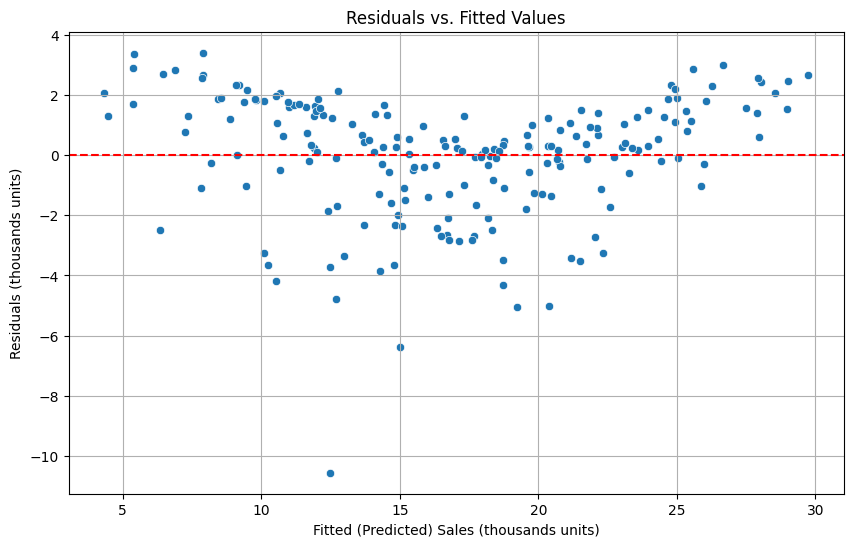

In [102]:
# plotting Residuals vs. Fitted Values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=fitted_values, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted (Predicted) Sales (thousands units)')
plt.ylabel('Residuals (thousands units)')
plt.title('Residuals vs. Fitted Values')
plt.grid(True)
plt.show()

**Checking for Linearity:**

* In this graph the points appear reasonably scattered around the zero line, with no obvious curved pattern. This shows that the assumption of linearity between Sales and the advertising budgets is plausible

**Checking for Constant Variance (Homoskedasticity):**

* The spread of the residuals appears wider for lower fitted values (on the left side of the plot, around 5-10) and narrower for higher fitted values (on the right side, around 25-30). This shows that the variance of the errors is not constant. This indicates heteroskedasticity

<Figure size 600x600 with 0 Axes>

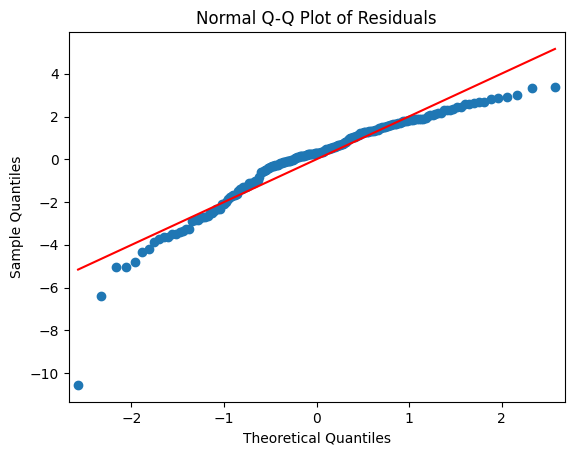

In [103]:
# plotting Normal Q-Q Plot of Residuals
plt.figure(figsize=(6, 6))
sm.qqplot(residuals, line='s')
plt.title('Normal Q-Q Plot of Residuals')
plt.show()

**Checking for Normality:**

* The points mostly follow the line in the middle, but at both ends (left and right), they start to move away from the line. On the left, they fall below the line, and on the right, they go above it. This means there are more extreme values than expect if the data followed a perfect normal distribution

* Conclusion: This plot visually confirms the results from the Omnibus and Jarque-Bera tests in the model summary (which had very low p-values), suggesting that the assumption of normally distributed residuals is violated. The residuals' distribution has heavier tails than a normal distribution

**Overall Diagnostics Summary:**


This linear model seems to fit the overall trend well, and the Durbin-Watson test is fine. But the residuals don’t seem to have constant spread, and they don’t follow a normal pattern, so some assumptions of the model might be violated.

### **Conclusion and Recommendations**

**Conclusion**

* This MLR model using YouTube, Facebook, and Newspaper advertising budgets as predictors explains a very high proportion of the variance in Sales (R² = 89.7%)

* overall model is highly statistically significant (Prob (F-statistic) ≈ 0.000)

* The intercept (3.5267 thousand units) represents the predicted Sales when no money is spent on any of these advertising platforms.

**Recommendations**

* The company should continue and potentially increase investment in YouTube and Facebook advertising

* The model suggests that per thousand USD spent Facebook advertising appears to be more effective, imples prioritizing Facebook spending might yield a higher return

* The company should re-evaluate or potentially reduce their budget allocation for Newspaper ads.